# Import Necessary Libraries

In [45]:
import numpy as np
import pandas as pd

from sklearn.model_selection import train_test_split

from xgboost import XGBRegressor

from sklearn.metrics import r2_score
from sklearn.metrics import mean_absolute_error

import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

import joblib

import warnings
warnings.filterwarnings('ignore')

# Load The Dataset

In [46]:
df = pd.read_csv('dataset.csv')

In [47]:
df

,Weight,Height,BMI,Gender,Age,BMIcase,Exercise Recommendation Plan
0,92.085190,1.760250,29.719488,Female,59,over weight,5
1,61.089124,1.595499,23.997776,Female,25,normal,4
2,82.454037,1.816538,24.987499,Female,50,normal,4
3,101.713306,1.790696,31.720047,Female,62,obese,6
4,99.609527,1.969726,25.673756,Male,57,over weight,5
...,...,...,...,...,...,...,...
4995,55.256111,1.442648,26.549697,Female,23,over weight,5
4996,106.683815,1.779544,33.688435,Female,65,severe obese,7
4997,55.645396,1.915978,15.158221,Male,26,sever thinness,1
4998,83.748623,1.751525,27.298892,Female,55,over weight,5


# Basic Information

In [48]:
print(df.isna().sum())

Weight                          0
Height                          0
BMI                             0
Gender                          0
Age                             0
BMIcase                         0
Exercise Recommendation Plan    0
dtype: int64


In [49]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 7 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   Weight                        5000 non-null   float64
 1   Height                        5000 non-null   float64
 2   BMI                           5000 non-null   float64
 3   Gender                        5000 non-null   object 
 4   Age                           5000 non-null   int64  
 5   BMIcase                       5000 non-null   object 
 6   Exercise Recommendation Plan  5000 non-null   int64  
dtypes: float64(3), int64(2), object(2)
memory usage: 273.6+ KB


In [50]:
df.describe()

,Weight,Height,BMI,Age,Exercise Recommendation Plan
count,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000
mean,79.760954,1.761265,25.900955,41.956000,4.823400
std,17.359682,0.129611,5.678326,14.030361,1.522589
min,50.002978,1.390171,12.791453,18.000000,1.000000
25%,64.705890,1.703790,21.501848,30.000000,4.000000
50%,79.536451,1.776202,26.314692,42.000000,5.000000
75%,95.102506,1.848437,30.741264,54.000000,6.000000
max,109.998871,1.979633,34.997098,65.000000,7.000000


# Data Distribution and Summary Statistics

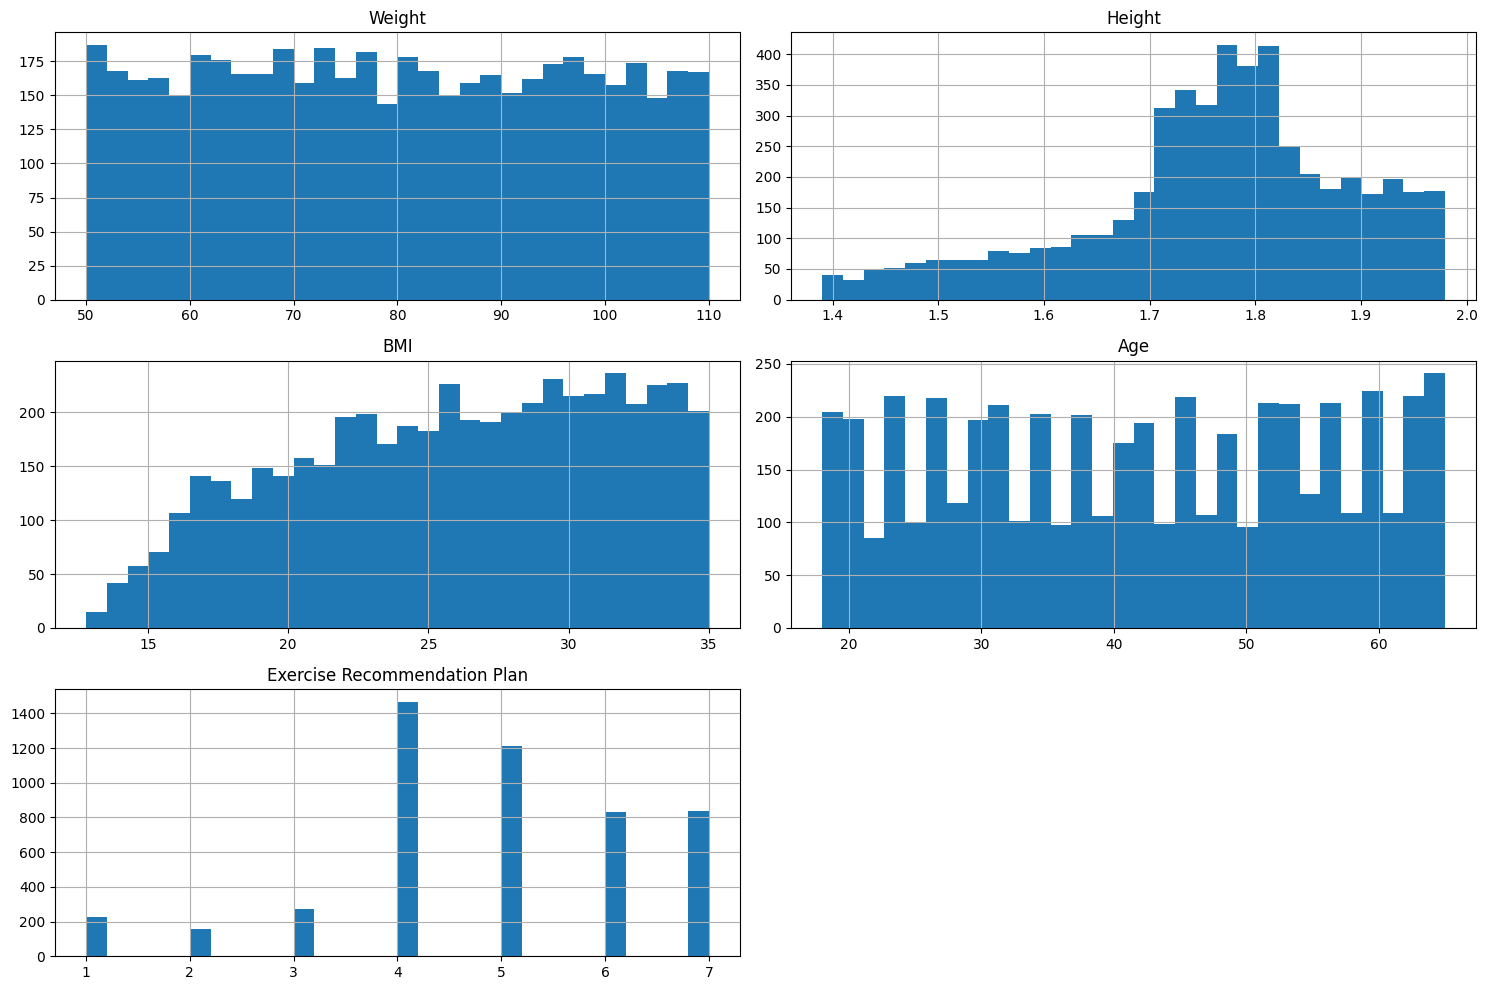

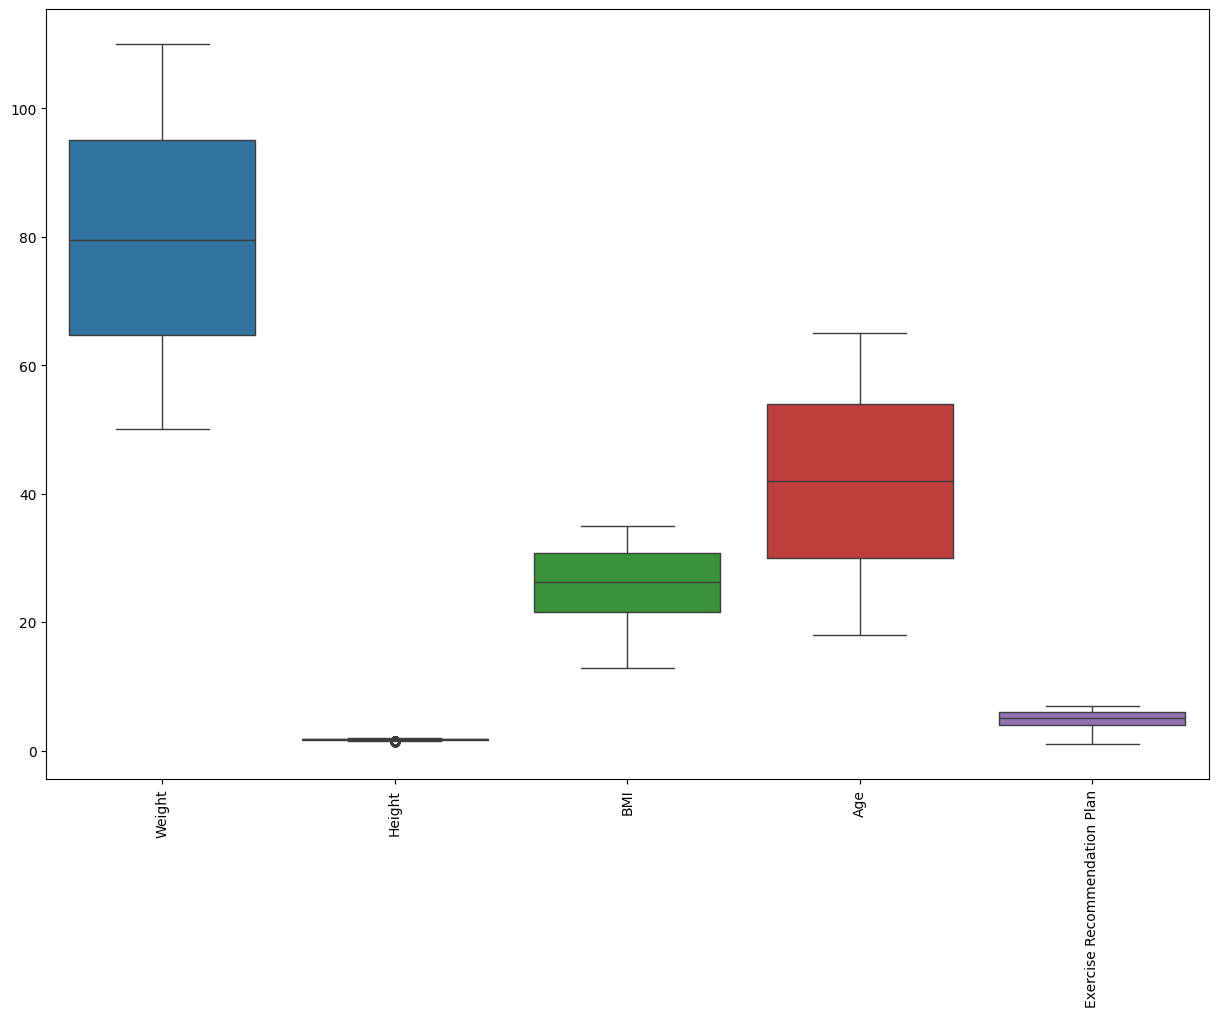

In [51]:
df.hist(bins=30, figsize=(15, 10))
plt.tight_layout()
plt.show()

plt.figure(figsize=(15, 10))
sns.boxplot(data=df)
plt.xticks(rotation=90)
plt.show()

# Correlation Analysis

In [52]:
numeric_cols = df.select_dtypes(include=['number']).columns
print(numeric_cols)

Index(['Weight', 'Height', 'BMI', 'Age', 'Exercise Recommendation Plan'], dtype='object')


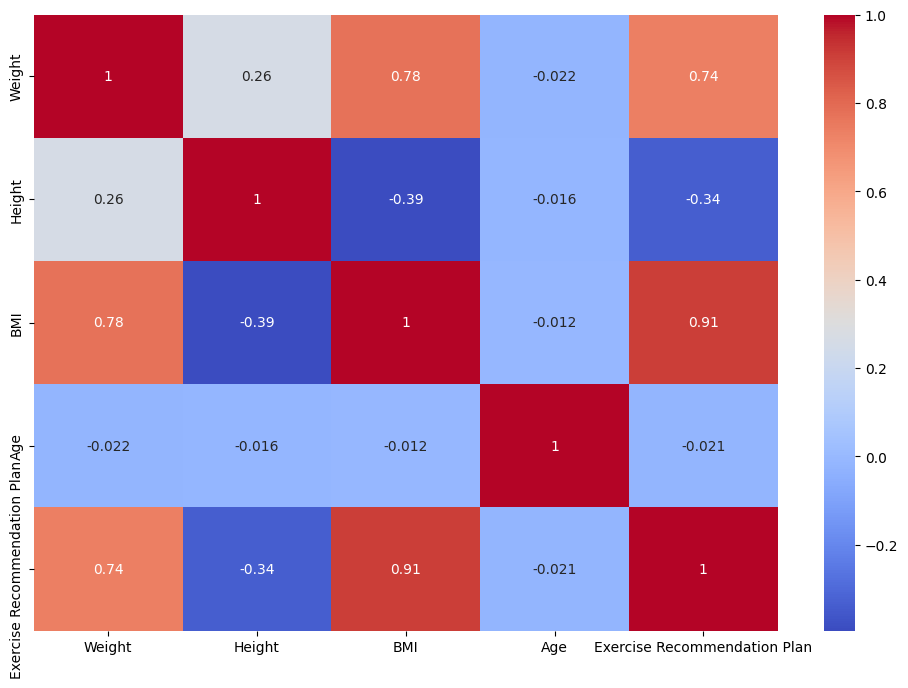

In [53]:
correlation_matrix = df[numeric_cols].corr()

plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.show()

# Analyzing Categorical Data

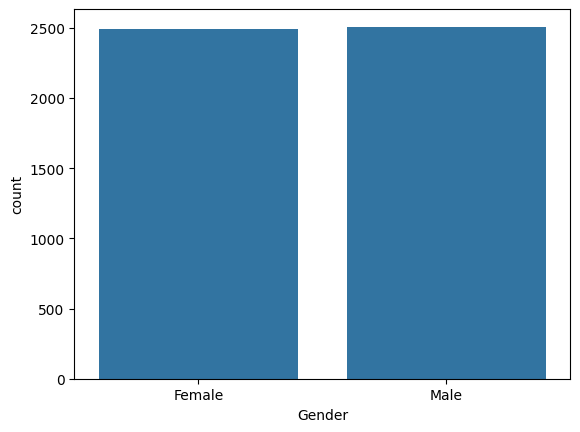

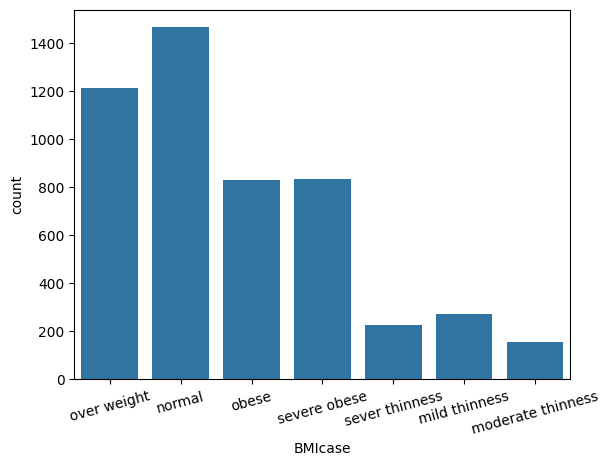

In [54]:
sns.countplot(x='Gender', data=df)
plt.show()

sns.countplot(x='BMIcase', data=df)
plt.xticks(rotation=15)
plt.show()

# Count Exercise Recommendation Plan

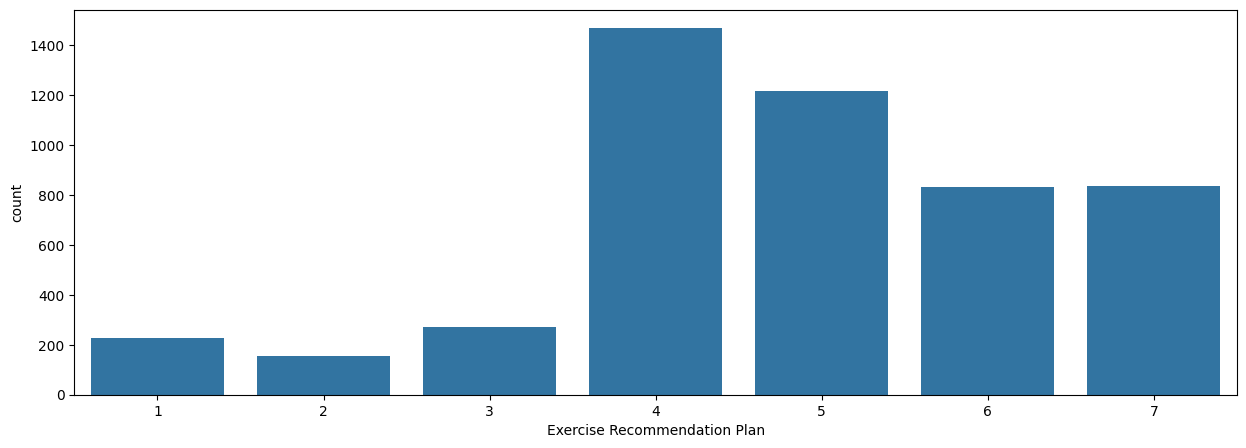

In [55]:
plt.figure(figsize=(15, 5))
sns.countplot(x='Exercise Recommendation Plan', data=df)
plt.show()

# Pairplot for Detailed Relationships

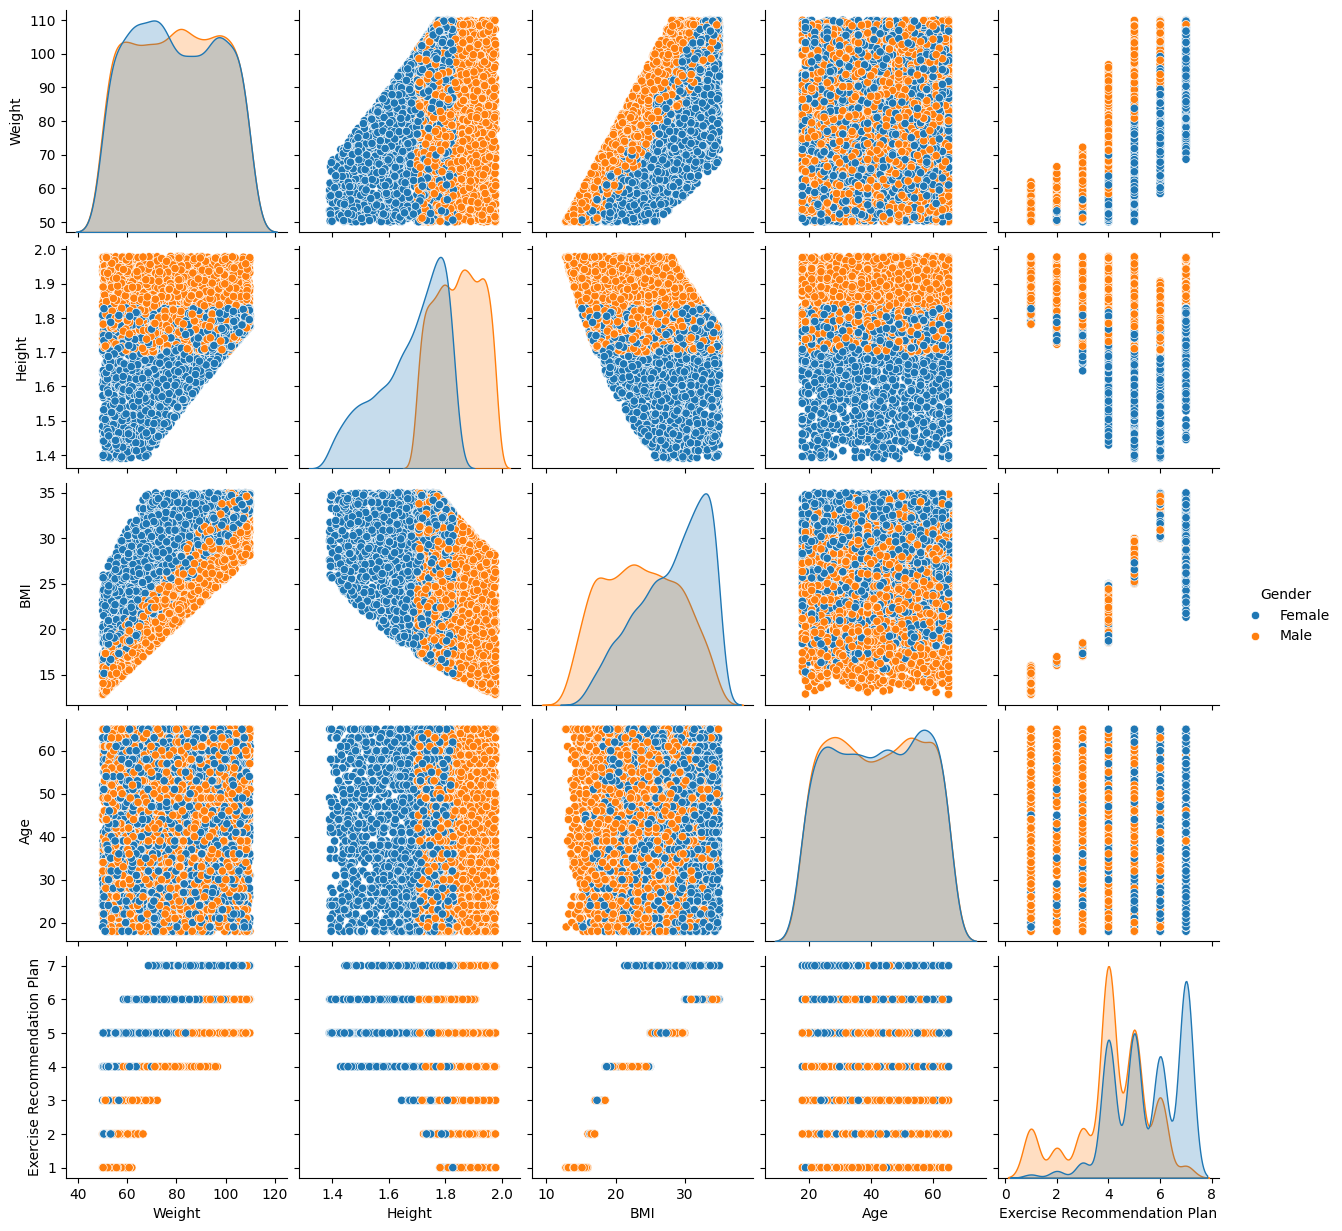

In [56]:
sns.pairplot(df, hue='Gender')
plt.show()

# Feature Engineering

In [57]:
df['Height_to_Weight_Ratio'] = df['Height'] / df['Weight']

In [58]:
df['BMI_Age_Interaction'] = df['BMI'] * df['Age']

In [59]:
df

,Weight,Height,BMI,Gender,Age,BMIcase,Exercise Recommendation Plan,Height_to_Weight_Ratio,BMI_Age_Interaction
0,92.085190,1.760250,29.719488,Female,59,over weight,5,0.019115,1753.449792
1,61.089124,1.595499,23.997776,Female,25,normal,4,0.026118,599.944389
2,82.454037,1.816538,24.987499,Female,50,normal,4,0.022031,1249.374973
3,101.713306,1.790696,31.720047,Female,62,obese,6,0.017605,1966.642919
4,99.609527,1.969726,25.673756,Male,57,over weight,5,0.019774,1463.404079
...,...,...,...,...,...,...,...,...,...
4995,55.256111,1.442648,26.549697,Female,23,over weight,5,0.026108,610.643023
4996,106.683815,1.779544,33.688435,Female,65,severe obese,7,0.016681,2189.748287
4997,55.645396,1.915978,15.158221,Male,26,sever thinness,1,0.034432,394.113736
4998,83.748623,1.751525,27.298892,Female,55,over weight,5,0.020914,1501.439079


# Encoding Data

In [60]:
# df_encoded = pd.get_dummies(df, columns=['Gender', 'BFPcase', 'BMIcase'])

from sklearn.preprocessing import OrdinalEncoder
cols_to_encode = ['Gender', 'BMIcase']
encoder = OrdinalEncoder()
df[cols_to_encode] = encoder.fit_transform(df[cols_to_encode])

# Drop y Column

In [61]:
X = df.drop('Exercise Recommendation Plan', axis=1)
y =  df[['Exercise Recommendation Plan']]

# Split Data Into train and test

In [62]:
X

,Weight,Height,BMI,Gender,Age,BMIcase,Height_to_Weight_Ratio,BMI_Age_Interaction
0,92.085190,1.760250,29.719488,0.0,59,4.0,0.019115,1753.449792
1,61.089124,1.595499,23.997776,0.0,25,2.0,0.026118,599.944389
2,82.454037,1.816538,24.987499,0.0,50,2.0,0.022031,1249.374973
3,101.713306,1.790696,31.720047,0.0,62,3.0,0.017605,1966.642919
4,99.609527,1.969726,25.673756,1.0,57,4.0,0.019774,1463.404079
...,...,...,...,...,...,...,...,...
4995,55.256111,1.442648,26.549697,0.0,23,4.0,0.026108,610.643023
4996,106.683815,1.779544,33.688435,0.0,65,6.0,0.016681,2189.748287
4997,55.645396,1.915978,15.158221,1.0,26,5.0,0.034432,394.113736
4998,83.748623,1.751525,27.298892,0.0,55,4.0,0.020914,1501.439079


In [63]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Model

In [64]:
model = XGBRegressor()

In [65]:
model.fit(X_train, y_train)

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=None, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=None, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             multi_strategy=None, n_estimators=None, n_jobs=None,
             num_parallel_tree=None, random_state=None, ...)

In [66]:
model.score(X_train, y_train)

1.0

In [67]:
model.score(X_test, y_test)

0.9995800256729126

# Predicting With Model

In [68]:
predict = model.predict(X_test)

In [69]:
X_test

,Weight,Height,BMI,Gender,Age,BMIcase,Height_to_Weight_Ratio,BMI_Age_Interaction
1501,109.737558,1.822618,33.034231,0.0,58,6.0,0.016609,1915.985389
2586,51.019797,1.629294,19.219389,0.0,40,2.0,0.031935,768.775566
2653,101.080468,1.814707,30.694061,1.0,18,3.0,0.017953,552.493095
1055,51.976623,1.916591,14.149770,1.0,65,5.0,0.036874,919.735033
705,69.853294,1.879273,19.779122,1.0,53,2.0,0.026903,1048.293474
...,...,...,...,...,...,...,...,...
4711,59.251516,1.864773,17.039140,1.0,54,0.0,0.031472,920.113581
2313,76.279706,1.935823,20.355320,1.0,24,2.0,0.025378,488.527678
3214,107.721823,1.957399,28.115449,1.0,60,4.0,0.018171,1686.926957
2732,98.976370,1.890679,27.688279,1.0,60,4.0,0.019102,1661.296717


In [70]:
model.predict(np.asarray([[92.08519020069818,1.7602495143340122,29.71948799321624,0,59,4,0.019115,1753.449792]]))

array([5.0000067], dtype=float32)

# R2 and MAE Score

In [71]:
r2 = r2_score(y_test,predict)
r2

0.9995800256729126

In [72]:
MAE = mean_absolute_error(y_test,predict)
MAE

0.0010237141847610474

# Saving Model

In [73]:
joblib.dump(model, 'model.pkl')

['model.pkl']